In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import folium
from folium import Circle
from geopy import Nominatim

from sklearn.preprocessing import MinMaxScaler
from IPython.display import display

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
drive.mount('/content/drive')
import shutil


Mounted at /gdrive
Mounted at /content/drive


In [ ]:
shutil.copy('/content/drive/MyDrive/Drive_C/Untitled folder/cost-of-living.csv','/content')
shutil.copy('/content/drive/MyDrive/Drive_C/Untitled folder/movehubqualityoflife.csv','/content')
shutil.copy('/content/drive/MyDrive/Drive_C/Untitled folder/movehubcostofliving.csv','/content')
# shutil.copy('/content/drive/MyDrive/textdata.txt','/content')
# shutil.copy('/content/drive/MyDrive/en_US.twitter.txt','/content')

'/content/movehubcostofliving.csv'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
city = pd.read_csv('cost-of-living.csv')
ncity=city.T

In [ ]:
print(ncity.shape)
ncity.columns = ncity.iloc[0]

(161, 55)


In [ ]:
ncity.head()

Unnamed: 0,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),Eggs (regular) (12),Local Cheese (1kg),Water (1.5 liter bottle),Bottle of Wine (Mid-Range),Domestic Beer (0.5 liter bottle),Imported Beer (0.33 liter bottle),Cigarettes 20 Pack (Marlboro),One-way Ticket (Local Transport),"Chicken Breasts (Boneless, Skinless), (1kg)",Monthly Pass (Regular Price),Gasoline (1 liter),Volkswagen Golf,Apartment (1 bedroom) in City Centre,Apartment (1 bedroom) Outside of Centre,Apartment (3 bedrooms) in City Centre,Apartment (3 bedrooms) Outside of Centre,"Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment",1 min. of Prepaid Mobile Tariff Local (No Discounts or Plans),"Internet (60 Mbps or More, Unlimited Data, Cable/ADSL)","Fitness Club, Monthly Fee for 1 Adult",Tennis Court Rent (1 Hour on Weekend),"Cinema, International Release, 1 Seat",1 Pair of Jeans (Levis 501 Or Similar),"1 Summer Dress in a Chain Store (Zara, H&M, ...)",1 Pair of Nike Running Shoes (Mid-Range),1 Pair of Men Leather Business Shoes,Price per Square Meter to Buy Apartment in City Centre,Price per Square Meter to Buy Apartment Outside of Centre,Average Monthly Net Salary (After Tax),"Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate",Taxi Start (Normal Tariff),Taxi 1km (Normal Tariff),Taxi 1hour Waiting (Normal Tariff),Apples (1kg),Oranges (1kg),Potato (1kg),Lettuce (1 head),Cappuccino (regular),"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red Meat),Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car),"Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child","International Primary School, Yearly for 1 Child"
Unnamed: 0,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three...",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),Eggs (regular) (12),Local Cheese (1kg),Water (1.5 liter bottle),Bottle of Wine (Mid-Range),Domestic Beer (0.5 liter bottle),Imported Beer (0.33 liter bottle),Cigarettes 20 Pack (Marlboro),One-way Ticket (Local Transport),"Chicken Breasts (Boneless, Skinless), (1kg)",Monthly Pass (Regular Price),Gasoline (1 liter),Volkswagen Golf,Apartment (1 bedroom) in City Centre,Apartment (1 bedroom) Outside of Centre,Apartment (3 bedrooms) in City Centre,Apartment (3 bedrooms) Outside of Centre,"Basic (Electricity, Heating, Cooling, Water, G...",1 min. of Prepaid Mobile Tariff Local (No Disc...,"Internet (60 Mbps or More, Unlimited Data, Cab...","Fitness Club, Monthly Fee for 1 Adult",Tennis Court Rent (1 Hour on Weekend),"Cinema, International Release, 1 Seat",1 Pair of Jeans (Levis 501 Or Similar),"1 Summer Dress in a Chain Store (Zara, H&M, ...)",1 Pair of Nike Running Shoes (Mid-Range),1 Pair of Men Leather Business Shoes,Price per Square Meter to Buy Apartment in Cit...,Price per Square Meter to Buy Apartment Outsid...,Average Monthly Net Salary (After Tax),"Mortgage Interest Rate in Percentages (%), Yea...",Taxi Start (Normal Tariff),Taxi 1km (Normal Tariff),Taxi 1hour Waiting (Normal Tariff),Apples (1kg),Oranges (1kg),Potato (1kg),Lettuce (1 head),Cappuccino (regular),"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red M...,Toyota Corolla 1.6l 97kW Comfort (Or Equivalen...,"Preschool (or Kindergarten), Full Day, Private...","International Primary School, Yearly for 1 Child"
"Saint Petersburg, Russia",7.34,29.35,4.4,2.2,2.2,0.76,0.53,0.98,0.71,1.18,7.6,0.63,5.87,0.88,1.89,2.2,0.59,3.96,42.56,0.67,19289.4,524.45,344.27,

In [ ]:
city.head()

,Unnamed: 0,"Saint Petersburg, Russia","Istanbul, Turkey","Izmir, Turkey","Helsinki, Finland","Chisinau, Moldova","Milan, Italy","Cairo, Egypt","Banja Luka, Bosnia And Herzegovina","Baku, Azerbaijan","Guadalajara, Mexico","Kathmandu, Nepal","Hanoi, Vietnam","Ho Chi Minh City, Vietnam","Mexico City, Mexico","Rome, Italy","Monterrey, Mexico","Yekaterinburg, Russia","Sarajevo, Bosnia And Herzegovina","Kharkiv, Ukraine","Kiev, Ukraine","Calgary, Canada","Tunis, Tunisia","Edmonton, Canada","Amsterdam, Netherlands","Belgrade, Serbia","Odessa, Ukraine","Paris, France","Eindhoven, Netherlands","Plovdiv, Bulgaria","Thessaloniki, Greece","Ottawa, Canada","Sofia, Bulgaria","Rotterdam, Netherlands","Varna, Bulgaria","Novi Sad, Serbia","Utrecht, Netherlands","Berlin, Germany","Beirut, Lebanon","Austin, TX, United States",...,"Tel Aviv-Yafo, Israel","Timisoara, Romania","Taipei, Taiwan","Kolkata, India","Skopje, Macedonia","Shanghai, China","Bangkok, Thailand","Mumbai, India","Reykjavik, Iceland","Amman, Jordan","Pune, India","Stockholm, Sweden","Buenos Aires, Argentina","Minsk, Belarus","San Jose, Costa Rica","Casablanca, Morocco","Lodz, Poland","Montreal, Canada","Sao Paulo, Brazil","Gothenburg, Sweden","Dublin, Ireland","Moscow, Russia","Santo Domingo, Dominican Republic","Adelaide, Australia","Zurich, Switzerland","Yerevan, Armenia","Manila, Philippines","Brisbane, Australia","Jakarta, Indonesia","Ankara, Turkey","Lviv, Ukraine","Novosibirsk, Russia","Bursa, Turkey","Brussels, Belgium","Jerusalem, Israel","Melbourne, Australia","Perth, Australia","Sydney, Australia","Alexandria, Egypt","Quito, Ecuador"
0,"Meal, Inexpensive Restaurant",7.34,4.58,3.06,12.00,4.67,15.0,3.38,3.58,5.27,5.25,1.99,1.94,1.94,4.77,15.0,5.75,5.88,3.57,4.50,5.63,13.75,1.92,13.75,15.0,5.39,5.65,15.0,15.0,5.10,10.0,11.00,6.14,13.0,6.12,4.84,15.0,8.5,8.98,13.48,...,15.54,5.23,3.61,2.53,4.87,4.56,1.78,3.80,17.96,6.34,3.16,11.40,5.99,8.93,6.29,4.45,4.72,10.31,6.58,10.45,15.0,8.80,5.10,11.19,23.12,4.70,3.56,12.38,2.62,3.82,3.75,5.72,3.82,15.0,15.56,10.22,12.43,11.81,2.81,3.59
1,"Meal for 2 People, Mid-range Restaurant, Three...",29.35,15.28,12.22,65.00,20.74,60.0,17.48,22.99,23.73,23.86,11.92,15.52,17.50,23.86,55.0,23.94,29.42,20.42,18.76,22.51,42.97,12.78,48.12,65.0,24.62,20.67,50.0,56.5,20.42,35.0,55.00,25.57,50.0,20.42,17.85,65.0,40.0,53.91,44.92,...,64.75,20.91,24.04,10.76,16.25,26.04,23.74,15.19,109.16,38.02,12.66,66.47,20.97,27.95,42.47,20.63,23.61,44.69,28.51,75.97,60.0,36.69,34.01,40.39,92.46,22.54,17.82,49.54,16.40,15.28,18.76,22.01,11.47,60.0,62.24,49.54,56.55,54.37,14.06,31.45
2,McMeal at McDonalds (or Equivalent Combo Meal),4.40,3.82,3.06,8.00,4.15,8.0,4.51,3.58,4.22,4.25,5.56,3.88,3.87,4.77,8.0,4.31,4.12,4.08,3.75,3.75,6.87,3.19,6.53,8.0,5.09,3.67,8.7,8.0,4.59,6.5,6.87,4.60,8.0,4.08,4.42,8.0,7.0,7.19,7.19,...,12.95,4.18,3.91,3.79,3.25,4.56,5.04,3.80,11.64,6.34,3.16,7.60,4.94,4.49,6.29,5.16,4.25,6.87,5.92,7.60,8.0,4.40,5.10,6.84,12.94,4.60,2.67,7.43,3.28,3.51,3.56,3.67,3.06,8.2,12.97,7.12,7.32,7.15,3.38,5.39
3,Domestic Beer (0.5 liter draught),2.20,3.06,2.29,6.50,1.04,5.0,1.69,1.02,0.84,1.43,2.38,0.78,0.78,1.91,5.0,1.68,1.47,1.79,0.88,1.13,4.81,1.60,4.12,5.0,1.70,0.94,7.0,5.0,1.28,3.5,4.81,1.53,4.0,1.02,1.50,5.0,3.5,3.22,4.49,...,7.77,1.25,1.77,1.87,1.62,1.30,2.37,2.28,8.73,6.34,2.28,6.55,1.50,1.80,2.36,2.58,1.77,4.81,1.97,6.31,5.8,2.93,1.70,4.97,6.24,1.13,1.25,4.95,2.62,2.75,1.50,1.10,2.37,4.0,7.26,5.57,5.90,4.97,1.69,1.35
4,Imported Beer (0.33 liter bottle),2.20,3.06,2.75,6.75,1.43,5.0,2.82,1.53,2.11,2.39,3.18,1.55,1.36,2.86,4.0,2.39,2.94,1.79,1.29,1.80,5.50,1.60,4.12,4.0,1.95,1.20,6.0,3.0,1.53,4.5,4.81,1.97,4.0,1.53,1.80,4.5,3.1,4.17,5.39,...,7.77,1.67,2.10,3.48,1.95,2.93,4.45,3.92,7.28,6.34,3.54,6.65,1.95,2.70,3.81,2.81,1.65,5.50,3.29,6.17,5.5,2.57,2.55,5.59,5.55,1.69,2.32,5.57,3.44,3.06,1.50,2.20,3.06,4.0,7.26,5.57,5.59,4.97,2.81,2.70


In [ ]:
locator = Nominatim(user_agent="myGeocoder")
location = locator.geocode("Kitchener, Canada")#("Saint Petersburg, Russia")

In [ ]:
print("Latitude = {}, Longitude = {}".format(location.latitude, location.longitude))

Latitude = 43.451291, Longitude = -80.4927815


In [ ]:
city = city.T
city.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
Unnamed: 0,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three...",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),Eggs (regular) (12),Local Cheese (1kg),Water (1.5 liter bottle),Bottle of Wine (Mid-Range),Domestic Beer (0.5 liter bottle),Imported Beer (0.33 liter bottle),Cigarettes 20 Pack (Marlboro),One-way Ticket (Local Transport),"Chicken Breasts (Boneless, Skinless), (1kg)",Monthly Pass (Regular Price),Gasoline (1 liter),Volkswagen Golf,Apartment (1 bedroom) in City Centre,Apartment (1 bedroom) Outside of Centre,Apartment (3 bedrooms) in City Centre,Apartment (3 bedrooms) Outside of Centre,"Basic (Electricity, Heating, Cooling, Water, G...",1 min. of Prepaid Mobile Tariff Local (No Disc...,"Internet (60 Mbps or More, Unlimited Data, Cab...","Fitness Club, Monthly Fee for 1 Adult",Tennis Court Rent (1 Hour on Weekend),"Cinema, International Release, 1 Seat",1 Pair of Jeans (Levis 501 Or Similar),"1 Summer Dress in a Chain Store (Zara, H&M, ...)",1 Pair of Nike Running Shoes (Mid-Range),1 Pair of Men Leather Business Shoes,Price per Square Meter to Buy Apartment in Cit...,Price per Square Meter to Buy Apartment Outsid...,Average Monthly Net Salary (After Tax),"Mortgage Interest Rate in Percentages (%), Yea...",Taxi Start (Normal Tariff),Taxi 1km (Normal Tariff),Taxi 1hour Waiting (Normal Tariff),Apples (1kg),Oranges (1kg),Potato (1kg),Lettuce (1 head),Cappuccino (regular),"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red M...,Toyota Corolla 1.6l 97kW Comfort (Or Equivalen...,"Preschool (or Kindergarten), Full Day, Private...","International Primary School, Yearly for 1 Child"
"Saint Petersburg, Russia",7.34,29.35,4.4,2.2,2.2,0.76,0.53,0.98,0.71,1.18,7.6,0.63,5.87,0.88,1.89,2.2,0.59,3.96,42.56,0.67,19289.4,524.45,344.27,1012.53,615.19,102.17,0.03,6.96,26.27,18.33,5.14,71.86,38.25,74.88,100.72,2476.05,1507.7,645.94,10.29,1.47,0.26,4.4,1.29,1.25,0.56,0.86,1.96,0.92,1.91,0.89,0.48,7.18,19305.3,411.83,5388.86
"Istanbul, Turkey",4.58,15.28,3.82,3.06,3.06,0.64,0.24,0.71,0.36,1.62,5.32,0.33,7.64,1.79,2.48,2.75,0.41,3.5,31.32,1.05,24443.2,291.55,177.72,545.5,314.98,59.33,0.11,14.2,25.1,15.66,3.82,36.15,25.91,61.31,50.58,1315.18,657.05,436,19.08,0.76,0.47,3.59,0.85,0.86,0.59,0.61,1.84,1.3,0.8,1.91,0.62,9.73,20874.7,282.94,6905.43
"Izmir, Turkey",3.06,12.22,3.06,2.29,2.75,0.61,0.22,0.65,0.38,1.51,4.97,0.29,6.11,1.63,2.09,2.29,0.46,3.05,22.92,1.04,24443.2,212.22,128.36,353.76,225.34,51.07,0.09,12.89,20.64,11.67,3.06,33.2,22.48,52.74,42.2,856.54,508.14,392.07,22.23,0.61,0.57,3.51,0.77,0.73,0.52,0.57,1.56,1.31,0.7,1.78,0.58,8.61,20898.8,212.18,4948.41
"Helsinki, Finland",12,65,8,6.5,6.75,2.66,1.89,0.96,2.27,2.02,6.87,1.54,12,2.23,2.95,7.7,2.8,9.42,59.7,1.54,22000,986.93,758.13,1819.32,1271.16,82.66,0.07,22.31,34.54,24.72,14,83.41,31.41,82.49,120.97,7444.54,4099.36,2382.56,1.38,6,1,47.04,2.1,1.75,0.91,2.3,3.87,2.13,2.91,1.61,1.25,12.34,24402.8,351.6,1641


In [ ]:
city.rename(columns=city.iloc[0], inplace = True)
city.drop(city.index[0], inplace = True)
city.head()

,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),Eggs (regular) (12),Local Cheese (1kg),Water (1.5 liter bottle),Bottle of Wine (Mid-Range),Domestic Beer (0.5 liter bottle),Imported Beer (0.33 liter bottle),Cigarettes 20 Pack (Marlboro),One-way Ticket (Local Transport),"Chicken Breasts (Boneless, Skinless), (1kg)",Monthly Pass (Regular Price),Gasoline (1 liter),Volkswagen Golf,Apartment (1 bedroom) in City Centre,Apartment (1 bedroom) Outside of Centre,Apartment (3 bedrooms) in City Centre,Apartment (3 bedrooms) Outside of Centre,"Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment",1 min. of Prepaid Mobile Tariff Local (No Discounts or Plans),"Internet (60 Mbps or More, Unlimited Data, Cable/ADSL)","Fitness Club, Monthly Fee for 1 Adult",Tennis Court Rent (1 Hour on Weekend),"Cinema, International Release, 1 Seat",1 Pair of Jeans (Levis 501 Or Similar),"1 Summer Dress in a Chain Store (Zara, H&M, ...)",1 Pair of Nike Running Shoes (Mid-Range),1 Pair of Men Leather Business Shoes,Price per Square Meter to Buy Apartment in City Centre,Price per Square Meter to Buy Apartment Outside of Centre,Average Monthly Net Salary (After Tax),"Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate",Taxi Start (Normal Tariff),Taxi 1km (Normal Tariff),Taxi 1hour Waiting (Normal Tariff),Apples (1kg),Oranges (1kg),Potato (1kg),Lettuce (1 head),Cappuccino (regular),"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red Meat),Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car),"Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child","International Primary School, Yearly for 1 Child"
"Saint Petersburg, Russia",7.34,29.35,4.4,2.2,2.2,0.76,0.53,0.98,0.71,1.18,7.6,0.63,5.87,0.88,1.89,2.2,0.59,3.96,42.56,0.67,19289.4,524.45,344.27,1012.53,615.19,102.17,0.03,6.96,26.27,18.33,5.14,71.86,38.25,74.88,100.72,2476.05,1507.7,645.94,10.29,1.47,0.26,4.4,1.29,1.25,0.56,0.86,1.96,0.92,1.91,0.89,0.48,7.18,19305.3,411.83,5388.86
"Istanbul, Turkey",4.58,15.28,3.82,3.06,3.06,0.64,0.24,0.71,0.36,1.62,5.32,0.33,7.64,1.79,2.48,2.75,0.41,3.5,31.32,1.05,24443.2,291.55,177.72,545.5,314.98,59.33,0.11,14.2,25.1,15.66,3.82,36.15,25.91,61.31,50.58,1315.18,657.05,436,19.08,0.76,0.47,3.59,0.85,0.86,0.59,0.61,1.84,1.3,0.8,1.91,0.62,9.73,20874.7,282.94,6905.43
"Izmir, Turkey",3.06,12.22,3.06,2.29,2.75,0.61,0.22,0.65,0.38,1.51,4.97,0.29,6.11,1.63,2.09,2.29,0.46,3.05,22.92,1.04,24443.2,212.22,128.36,353.76,225.34,51.07,0.09,12.89,20.64,11.67,3.06,33.2,22.48,52.74,42.2,856.54,508.14,392.07,22.23,0.61,0.57,3.51,0.77,0.73,0.52,0.57,1.56,1.31,0.7,1.78,0.58,8.61,20898.8,212.18,4948.41
"Helsinki, Finland",12,65,8,6.5,6.75,2.66,1.89,0.96,2.27,2.02,6.87,1.54,12,2.23,2.95,7.7,2.8,9.42,59.7,1.54,22000,986.93,758.13,1819.32,1271.16,82.66,0.07,22.31,34.54,24.72,14,83.41,31.41,82.49,120.97,7444.54,4099.36,2382.56,1.38,6,1,47.04,2.1,1.75,0.91,2.3,3.87,2.13,2.91,1.61,1.25,12.34,24402.8,351.6,1641
"Chisinau, Moldova",4.67,20.74,4.15,1.04,1.43,0.64,0.44,0.68,0.33,1.11,5.79,0.59,3.61,0.77,1.38,1.56,0.1,3.55,9.33,0.98,16335.1,244.49,177.96,428.67,330.84,113.46,0.07,8.58,26.64,12.1,5.19,56.54,35.37,86.25,94.38,904.82,589.13,286.95,9.42,1.3,0.18,3.11,0.7,1.22,0.56,0.84,1.25,0.93,1.56,1.37,0.59,5.37,17238.1,210.52,2679.3


In [ ]:
city = city.reset_index()
print(city.head())
# lets rename the index column to location
city = city.rename(columns={'index': 'Location'})
city.head()

                      index  ... International Primary School, Yearly for 1 Child
0  Saint Petersburg, Russia  ...                                          5388.86
1          Istanbul, Turkey  ...                                          6905.43
2             Izmir, Turkey  ...                                          4948.41
3         Helsinki, Finland  ...                                             1641
4         Chisinau, Moldova  ...                                           2679.3

[5 rows x 56 columns]


,Location,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),Eggs (regular) (12),Local Cheese (1kg),Water (1.5 liter bottle),Bottle of Wine (Mid-Range),Domestic Beer (0.5 liter bottle),Imported Beer (0.33 liter bottle),Cigarettes 20 Pack (Marlboro),One-way Ticket (Local Transport),"Chicken Breasts (Boneless, Skinless), (1kg)",Monthly Pass (Regular Price),Gasoline (1 liter),Volkswagen Golf,Apartment (1 bedroom) in City Centre,Apartment (1 bedroom) Outside of Centre,Apartment (3 bedrooms) in City Centre,Apartment (3 bedrooms) Outside of Centre,"Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment",1 min. of Prepaid Mobile Tariff Local (No Discounts or Plans),"Internet (60 Mbps or More, Unlimited Data, Cable/ADSL)","Fitness Club, Monthly Fee for 1 Adult",Tennis Court Rent (1 Hour on Weekend),"Cinema, International Release, 1 Seat",1 Pair of Jeans (Levis 501 Or Similar),"1 Summer Dress in a Chain Store (Zara, H&M, ...)",1 Pair of Nike Running Shoes (Mid-Range),1 Pair of Men Leather Business Shoes,Price per Square Meter to Buy Apartment in City Centre,Price per Square Meter to Buy Apartment Outside of Centre,Average Monthly Net Salary (After Tax),"Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate",Taxi Start (Normal Tariff),Taxi 1km (Normal Tariff),Taxi 1hour Waiting (Normal Tariff),Apples (1kg),Oranges (1kg),Potato (1kg),Lettuce (1 head),Cappuccino (regular),"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red Meat),Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car),"Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child","International Primary School, Yearly for 1 Child"
0,"Saint Petersburg, Russia",7.34,29.35,4.4,2.2,2.2,0.76,0.53,0.98,0.71,1.18,7.6,0.63,5.87,0.88,1.89,2.2,0.59,3.96,42.56,0.67,19289.4,524.45,344.27,1012.53,615.19,102.17,0.03,6.96,26.27,18.33,5.14,71.86,38.25,74.88,100.72,2476.05,1507.7,645.94,10.29,1.47,0.26,4.4,1.29,1.25,0.56,0.86,1.96,0.92,1.91,0.89,0.48,7.18,19305.3,411.83,5388.86
1,"Istanbul, Turkey",4.58,15.28,3.82,3.06,3.06,0.64,0.24,0.71,0.36,1.62,5.32,0.33,7.64,1.79,2.48,2.75,0.41,3.5,31.32,1.05,24443.2,291.55,177.72,545.5,314.98,59.33,0.11,14.2,25.1,15.66,3.82,36.15,25.91,61.31,50.58,1315.18,657.05,436,19.08,0.76,0.47,3.59,0.85,0.86,0.59,0.61,1.84,1.3,0.8,1.91,0.62,9.73,20874.7,282.94,6905.43
2,"Izmir, Turkey",3.06,12.22,3.06,2.29,2.75,0.61,0.22,0.65,0.38,1.51,4.97,0.29,6.11,1.63,2.09,2.29,0.46,3.05,22.92,1.04,24443.2,212.22,128.36,353.76,225.34,51.07,0.09,12.89,20.64,11.67,3.06,33.2,22.48,52.74,42.2,856.54,508.14,392.07,22.23,0.61,0.57,3.51,0.77,0.73,0.52,0.57,1.56,1.31,0.7,1.78,0.58,8.61,20898.8,212.18,4948.41
3,"Helsinki, Finland",12,65,8,6.5,6.75,2.66,1.89,0.96,2.27,2.02,6.87,1.54,12,2.23,2.95,7.7,2.8,9.42,59.7,1.54,22000,986.93,758.13,1819.32,1271.16,82.66,0.07,22.31,34.54,24.72,14,83.41,31.41,82.49,120.97,7444.54,4099.36,2382.56,1.38,6,1,47.04,2.1,1.75,0.91,2.3,3.87,2.13,2.91,1.61,1.25,12.34,24402.8,351.6,1641
4,"Chisinau, Moldova",4.67,20.74,4.15,1.04,1.43,0.64,0.44,0.68,0.33,1.11,5.79,0.59,3.61,0.77,1.38,1.56,0.1,3.55,9.33,0.98,16335.1,244.49,177.96,428.67,330.84,113.46,0.07,8.58,26.64,12.1,5.19,56.54,35.37,86.25,94.38,904.82,589.13,286.95,9.42,1.3,0.18,3.11,0.7,1.22,0.56,0.84,1.25,0.93,1.56,1.37,0.59,5.37,17238.1,210.52,2679.3


In [ ]:
# lets check the column names
city.columns

Index(['Location', 'Meal, Inexpensive Restaurant',
       'Meal for 2 People, Mid-range Restaurant, Three-course',
       'McMeal at McDonalds (or Equivalent Combo Meal)',
       'Domestic Beer (0.5 liter draught)',
       'Imported Beer (0.33 liter bottle)', 'Coke/Pepsi (0.33 liter bottle)',
       'Water (0.33 liter bottle) ', 'Milk (regular), (1 liter)',
       'Loaf of Fresh White Bread (500g)', 'Eggs (regular) (12)',
       'Local Cheese (1kg)', 'Water (1.5 liter bottle)',
       'Bottle of Wine (Mid-Range)', 'Domestic Beer (0.5 liter bottle)',
       'Imported Beer (0.33 liter bottle)', 'Cigarettes 20 Pack (Marlboro)',
       'One-way Ticket (Local Transport)',
       'Chicken Breasts (Boneless, Skinless), (1kg)',
       'Monthly Pass (Regular Price)', 'Gasoline (1 liter)', 'Volkswagen Golf',
       'Apartment (1 bedroom) in City Centre',
       'Apartment (1 bedroom) Outside of Centre',
       'Apartment (3 bedrooms) in City Centre',
       'Apartment (3 bedrooms) Outside of Cen

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# It can be time consuming
from geopy.extra.rate_limiter import RateLimiter

# 1 - conveneint function to delay between geocoding calls
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)

# 2- - create location column
city['location'] = city['Location'].apply(geocode)

# 3 - create longitude, laatitude and altitude from location column (returns tuple)
city['point'] = city['location'].apply(lambda loc: tuple(loc.point) if loc else None)

# 4 - split point column into latitude, longitude and altitude columns
city[['latitude', 'longitude', 'altitude']] = pd.DataFrame(city['point'].tolist(), index=city.index)

# lets check the head of the data set
city.head()

RateLimiter caught an error, retrying (0/2 tries). Called with (*('Chicago, IL, United States',), **{}).
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/geopy/geocoders/base.py", line 344, in _call_geocoder
    page = requester(req, timeout=timeout, **kwargs)
  File "/usr/lib/python3.7/urllib/request.py", line 525, in open
    response = self._open(req, data)
  File "/usr/lib/python3.7/urllib/request.py", line 543, in _open
    '_open', req)
  File "/usr/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.7/urllib/request.py", line 1393, in https_open
    context=self._context, check_hostname=self._check_hostname)
  File "/usr/lib/python3.7/urllib/request.py", line 1353, in do_open
    r = h.getresponse()
  File "/usr/lib/python3.7/http/client.py", line 1369, in getresponse
    response.begin()
  File "/usr/lib/python3.7/http/client.py", line 310, in begin
    version, status, reason = self._read

,Location,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),Eggs (regular) (12),Local Cheese (1kg),Water (1.5 liter bottle),Bottle of Wine (Mid-Range),Domestic Beer (0.5 liter bottle),Imported Beer (0.33 liter bottle),Cigarettes 20 Pack (Marlboro),One-way Ticket (Local Transport),"Chicken Breasts (Boneless, Skinless), (1kg)",Monthly Pass (Regular Price),Gasoline (1 liter),Volkswagen Golf,Apartment (1 bedroom) in City Centre,Apartment (1 bedroom) Outside of Centre,Apartment (3 bedrooms) in City Centre,Apartment (3 bedrooms) Outside of Centre,"Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment",1 min. of Prepaid Mobile Tariff Local (No Discounts or Plans),"Internet (60 Mbps or More, Unlimited Data, Cable/ADSL)","Fitness Club, Monthly Fee for 1 Adult",Tennis Court Rent (1 Hour on Weekend),"Cinema, International Release, 1 Seat",1 Pair of Jeans (Levis 501 Or Similar),"1 Summer Dress in a Chain Store (Zara, H&M, ...)",1 Pair of Nike Running Shoes (Mid-Range),1 Pair of Men Leather Business Shoes,Price per Square Meter to Buy Apartment in City Centre,Price per Square Meter to Buy Apartment Outside of Centre,Average Monthly Net Salary (After Tax),"Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate",Taxi Start (Normal Tariff),Taxi 1km (Normal Tariff),Taxi 1hour Waiting (Normal Tariff),Apples (1kg),Oranges (1kg),Potato (1kg),Lettuce (1 head),Cappuccino (regular),"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red Meat),Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car),"Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child","International Primary School, Yearly for 1 Child",location,point,latitude,longitude,altitude
0,"Saint Petersburg, Russia",7.34,29.35,4.4,2.2,2.2,0.76,0.53,0.98,0.71,1.18,7.6,0.63,5.87,0.88,1.89,2.2,0.59,3.96,42.56,0.67,19289.4,524.45,344.27,1012.53,615.19,102.17,0.03,6.96,26.27,18.33,5.14,71.86,38.25,74.88,100.72,2476.05,1507.7,645.94,10.29,1.47,0.26,4.4,1.29,1.25,0.56,0.86,1.96,0.92,1.91,0.89,0.48,7.18,19305.3,411.83,5388.86,"(Санкт-Петербург, Северо-Западный федеральный ...","(59.938732, 30.316229, 0.0)",59.938732,30.316229,0.0
1,"Istanbul, Turkey",4.58,15.28,3.82,3.06,3.06,0.64,0.24,0.71,0.36,1.62,5.32,0.33,7.64,1.79,2.48,2.75,0.41,3.5,31.32,1.05,24443.2,291.55,177.72,545.5,314.98,59.33,0.11,14.2,25.1,15.66,3.82,36.15,25.91,61.31,50.58,1315.18,657.05,436,19.08,0.76,0.47,3.59,0.85,0.86,0.59,0.61,1.84,1.3,0.8,1.91,0.62,9.73,20874.7,282.94,6905.43,"(İstanbul, Fatih, İstanbul, Marmara Bölgesi, 3...","(41.0096334, 28.9651646, 0.0)",41.009633,28.965165,0.0
2,"Izmir, Turkey",3.06,12.22,3.06,2.29,2.75,0.61,0.22,0.65,0.38,1.51,4.97,0.29,6.11,1.63,2.09,2.29,0.46,3.05,22.92,1.04,24443.2,212.22,128.36,353.76,225.34,51.07,0.09,12.89,20.64,11.67,3.06,33.2,22.48,52.74,42.2,856.54,508.14,392.07,22.23,0.61,0.57,3.51,0.77,0.73,0.52,0.57,1.56,1.31,0.7,1.78,0.58,8.61,20898.8,212.18,4948.41,"(İzmir, Konak, İzmir, Ege Bölgesi, 35180, Türk...","(38.4147331, 27.1434119, 0.0)",38.414733,27.143412,0.0
3,"Helsinki, Finland",12,65,8,6.5,6.75,2.66,1.89,0.96,2.27,2.02,6.87,1.54,12,2.23,2.95,7.7,2.8,9.42,59.7,1.54,22000,986.93,758.13,1819.32,1271.16,82.66,0.07,22.31,34.54,24.72,14,83.41,31.41,82.49,120.97,7444.54,4099.36,2382.56,1.38,6,1,47.04,2.1,1.75,0.91,2.3,3.87,2.13,2.91,1.61,1.25,12.34,24402.8,351.6,1641,"(Helsinki, Helsingin seutukunta, Uusimaa, Etel...","(60.1674881, 24.9427473, 0.0)",60.167488,24.942747,0.0
4,"Chisinau, Moldova",4.67,20.74,4.15,1.04,1.43,0.64,0.44,0.68,0.33,1.11,5.79,0.59,3.61,0.77,1.38,1.56,0.1,3.55,9.33,0.98,16335.1,244.49,177.96,428.67,330.84,113.46,0.07,8.58,26.64,12.1,5.19,56.54,35.37,86.25,94.38,904.82,589.13,286.95,9.42,1.3,0.18,

In [ ]:
# lets remove some unnecessary columns from the data
city = city.drop(['location','point','altitude'], axis = 1)

# lets check the column names again
city.columns

Index(['Location', 'Meal, Inexpensive Restaurant',
       'Meal for 2 People, Mid-range Restaurant, Three-course',
       'McMeal at McDonalds (or Equivalent Combo Meal)',
       'Domestic Beer (0.5 liter draught)',
       'Imported Beer (0.33 liter bottle)', 'Coke/Pepsi (0.33 liter bottle)',
       'Water (0.33 liter bottle) ', 'Milk (regular), (1 liter)',
       'Loaf of Fresh White Bread (500g)', 'Eggs (regular) (12)',
       'Local Cheese (1kg)', 'Water (1.5 liter bottle)',
       'Bottle of Wine (Mid-Range)', 'Domestic Beer (0.5 liter bottle)',
       'Imported Beer (0.33 liter bottle)', 'Cigarettes 20 Pack (Marlboro)',
       'One-way Ticket (Local Transport)',
       'Chicken Breasts (Boneless, Skinless), (1kg)',
       'Monthly Pass (Regular Price)', 'Gasoline (1 liter)', 'Volkswagen Golf',
       'Apartment (1 bedroom) in City Centre',
       'Apartment (1 bedroom) Outside of Centre',
       'Apartment (3 bedrooms) in City Centre',
       'Apartment (3 bedrooms) Outside of Cen

## Aggregating Features

In [ ]:
def food(city):
    return int(round((city[['Meal, Inexpensive Restaurant',
       'Domestic Beer (0.5 liter draught)',
       'Imported Beer (0.33 liter bottle)', 'Coke/Pepsi (0.33 liter bottle)',
       'Water (0.33 liter bottle) ', 'Milk (regular), (1 liter)',
       'Loaf of Fresh White Bread (500g)', 'Eggs (regular) (12)',
       'Local Cheese (1kg)', 'Water (1.5 liter bottle)',
       'Bottle of Wine (Mid-Range)', 'Domestic Beer (0.5 liter bottle)',
       'Imported Beer (0.33 liter bottle)', 'Cigarettes 20 Pack (Marlboro)',
       'Chicken Breasts (Boneless, Skinless), (1kg)', 'Apples (1kg)', 'Oranges (1kg)',
       'Potato (1kg)', 'Lettuce (1 head)', 'Cappuccino (regular)',
       'Rice (white), (1kg)', 'Tomato (1kg)', 'Banana (1kg)', 'Onion (1kg)',
       'Beef Round (1kg) (or Equivalent Back Leg Red Meat)',]].mean()).mean()))

def travel(city):
    return int(round((city[['One-way Ticket (Local Transport)',
                            'Monthly Pass (Regular Price)', 'Gasoline (1 liter)',
                           'Taxi Start (Normal Tariff)', 'Taxi 1km (Normal Tariff)',
                           'Taxi 1hour Waiting (Normal Tariff)',]].mean()).mean()))

def living(city):
    return int(round((city[[ 'Volkswagen Golf',
       'Apartment (1 bedroom) in City Centre',
       'Apartment (1 bedroom) Outside of Centre',
       'Apartment (3 bedrooms) in City Centre',
       'Apartment (3 bedrooms) Outside of Centre',
       'Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment',
         'Price per Square Meter to Buy Apartment in City Centre',
       'Price per Square Meter to Buy Apartment Outside of Centre',
        'Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car)',]].mean()).mean()))

def lifestyle(city):
    return int(round((city[['1 min. of Prepaid Mobile Tariff Local (No Discounts or Plans)',
       'Internet (60 Mbps or More, Unlimited Data, Cable/ADSL)',
       'Fitness Club, Monthly Fee for 1 Adult',
       'Tennis Court Rent (1 Hour on Weekend)',
       'Cinema, International Release, 1 Seat',
       '1 Pair of Jeans (Levis 501 Or Similar)',
       '1 Summer Dress in a Chain Store (Zara, H&M, ...)',
       '1 Pair of Nike Running Shoes (Mid-Range)',
       '1 Pair of Men Leather Business Shoes', 
       'Meal for 2 People, Mid-range Restaurant, Three-course',
       'McMeal at McDonalds (or Equivalent Combo Meal)',]].mean()).mean()))

def education(city):
    return int(round((city[['Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child',
       'International Primary School, Yearly for 1 Child',]].mean()).mean()))

def income(city):
    return int(round((city[['Average Monthly Net Salary (After Tax)',
       'Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate',]].mean()).mean()))


In [ ]:
city['Food'] = city.apply(food, axis = 1)
city['Travel'] = city.apply(travel, axis = 1)
city['Living'] = city.apply(living, axis = 1)
city['Lifestyle'] = city.apply(lifestyle, axis = 1)
city['Education'] = city.apply(education, axis = 1)
city['Income'] = city.apply(income, axis = 1)

In [ ]:
city.head(100)

,Location,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),Eggs (regular) (12),Local Cheese (1kg),Water (1.5 liter bottle),Bottle of Wine (Mid-Range),Domestic Beer (0.5 liter bottle),Imported Beer (0.33 liter bottle),Cigarettes 20 Pack (Marlboro),One-way Ticket (Local Transport),"Chicken Breasts (Boneless, Skinless), (1kg)",Monthly Pass (Regular Price),Gasoline (1 liter),Volkswagen Golf,Apartment (1 bedroom) in City Centre,Apartment (1 bedroom) Outside of Centre,Apartment (3 bedrooms) in City Centre,Apartment (3 bedrooms) Outside of Centre,"Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment",1 min. of Prepaid Mobile Tariff Local (No Discounts or Plans),"Internet (60 Mbps or More, Unlimited Data, Cable/ADSL)","Fitness Club, Monthly Fee for 1 Adult",Tennis Court Rent (1 Hour on Weekend),"Cinema, International Release, 1 Seat",1 Pair of Jeans (Levis 501 Or Similar),"1 Summer Dress in a Chain Store (Zara, H&M, ...)",1 Pair of Nike Running Shoes (Mid-Range),1 Pair of Men Leather Business Shoes,Price per Square Meter to Buy Apartment in City Centre,Price per Square Meter to Buy Apartment Outside of Centre,Average Monthly Net Salary (After Tax),"Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate",Taxi Start (Normal Tariff),Taxi 1km (Normal Tariff),Taxi 1hour Waiting (Normal Tariff),Apples (1kg),Oranges (1kg),Potato (1kg),Lettuce (1 head),Cappuccino (regular),"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red Meat),Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car),"Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child","International Primary School, Yearly for 1 Child",latitude,longitude,Food,Travel,Living,Lifestyle,Education,Income
0,"Saint Petersburg, Russia",7.34,29.35,4.4,2.2,2.2,0.76,0.53,0.98,0.71,1.18,7.6,0.63,5.87,0.88,1.89,2.2,0.59,3.96,42.56,0.67,19289.4,524.45,344.27,1012.53,615.19,102.17,0.03,6.96,26.27,18.33,5.14,71.86,38.25,74.88,100.72,2476.05,1507.7,645.94,10.29,1.47,0.26,4.4,1.29,1.25,0.56,0.86,1.96,0.92,1.91,0.89,0.48,7.18,19305.3,411.83,5388.86,59.938732,30.316229,2,8,5020,34,2900,328
1,"Istanbul, Turkey",4.58,15.28,3.82,3.06,3.06,0.64,0.24,0.71,0.36,1.62,5.32,0.33,7.64,1.79,2.48,2.75,0.41,3.5,31.32,1.05,24443.2,291.55,177.72,545.5,314.98,59.33,0.11,14.2,25.1,15.66,3.82,36.15,25.91,61.31,50.58,1315.18,657.05,436,19.08,0.76,0.47,3.59,0.85,0.86,0.59,0.61,1.84,1.3,0.8,1.91,0.62,9.73,20874.7,282.94,6905.43,41.009633,28.965165,2,6,5409,23,3594,228
2,"Izmir, Turkey",3.06,12.22,3.06,2.29,2.75,0.61,0.22,0.65,0.38,1.51,4.97,0.29,6.11,1.63,2.09,2.29,0.46,3.05,22.92,1.04,24443.2,212.22,128.36,353.76,225.34,51.07,0.09,12.89,20.64,11.67,3.06,33.2,22.48,52.74,42.2,856.54,508.14,392.07,22.23,0.61,0.57,3.51,0.77,0.73,0.52,0.57,1.56,1.31,0.7,1.78,0.58,8.61,20898.8,212.18,4948.41,38.414733,27.143412,2,5,5297,19,2580,207
3,"Helsinki, Finland",12,65,8,6.5,6.75,2.66,1.89,0.96,2.27,2.02,6.87,1.54,12,2.23,2.95,7.7,2.8,9.42,59.7,1.54,22000,986.93,758.13,1819.32,1271.16,82.66,0.07,22.31,34.54,24.72,14,83.41,31.41,82.49,120.97,7444.54,4099.36,2382.56,1.38,6,1,47.04,2.1,1.75,0.91,2.3,3.87,2.13,2.91,1.61,1.25,12.34,24402.8,351.6,1641,60.167488,24.942747,4,20,6985,44,996,1192
4,"Chisinau, Moldova",4.67,20.74,4.15,1.04,1.43,0.64,0.44,0.68,0.33,1.11,5.79,0.59,3.61,0.77,1.38,1.56,0.1,3.55,9.33,0.98,16335.1,244.49,177.96,428.67,330.84,113.46,0.07,8.58,26.64,12.1,5.19,56.54,35.37,86.25,94.38,904.82,589.13,286.95,9.42,1.3,0.18,3.11,0.7,1.22,0.56,0.84,1.25,0.93,1.56,1.37,0.59,5.37,17238.1,210.52,2679.3,47.024512,28.832292,2,2,4040,32,1445,148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [ ]:
# lets split the location to fetch the country names
city['Location'].str.split(', ')[0][-1]

'Russia'

In [ ]:
city.at[63, 'Location']="Tbilisi, Georgia, "+"United States"

In [ ]:
# lets apply the same function on whole dataset
city['country'] = city['Location'].str.split(', ')

# lets store the second one in the country column
city['Country'] = city['country'].apply(lambda x: x[-1])
ser1=city['Country'].value_counts()

#lets check the values in the country column
#city[city['Country'].value_counts()>5]["Food"]

In [ ]:
city["Location"].iloc[63]

'Tbilisi, Georgia, United States'

In [ ]:
li=[]
c=list(ser1.index)
for i in range(len(ser1)):
  if ser1[i]>=2:
    li.append(c[i])

In [ ]:
len(li)
li

['United States',
 'India',
 'Canada',
 'Poland',
 'Romania',
 'Australia',
 'Netherlands',
 'Germany',
 'Ukraine',
 'Russia',
 'Turkey',
 'Bulgaria',
 'South Africa',
 'Spain',
 'Mexico',
 'Greece',
 'Czech Republic',
 'Lithuania',
 'Serbia',
 'Sweden',
 'Bosnia And Herzegovina',
 'China',
 'United Arab Emirates',
 'Vietnam',
 'Egypt',
 'Israel',
 'Portugal',
 'Italy']

In [ ]:
city.to_pickle("./city.pkl")

In [ ]:
city.head()

,Location,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),Eggs (regular) (12),Local Cheese (1kg),Water (1.5 liter bottle),Bottle of Wine (Mid-Range),Domestic Beer (0.5 liter bottle),Imported Beer (0.33 liter bottle),Cigarettes 20 Pack (Marlboro),One-way Ticket (Local Transport),"Chicken Breasts (Boneless, Skinless), (1kg)",Monthly Pass (Regular Price),Gasoline (1 liter),Volkswagen Golf,Apartment (1 bedroom) in City Centre,Apartment (1 bedroom) Outside of Centre,Apartment (3 bedrooms) in City Centre,Apartment (3 bedrooms) Outside of Centre,"Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment",1 min. of Prepaid Mobile Tariff Local (No Discounts or Plans),"Internet (60 Mbps or More, Unlimited Data, Cable/ADSL)","Fitness Club, Monthly Fee for 1 Adult",Tennis Court Rent (1 Hour on Weekend),"Cinema, International Release, 1 Seat",1 Pair of Jeans (Levis 501 Or Similar),"1 Summer Dress in a Chain Store (Zara, H&M, ...)",1 Pair of Nike Running Shoes (Mid-Range),1 Pair of Men Leather Business Shoes,Price per Square Meter to Buy Apartment in City Centre,Price per Square Meter to Buy Apartment Outside of Centre,Average Monthly Net Salary (After Tax),"Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate",Taxi Start (Normal Tariff),Taxi 1km (Normal Tariff),Taxi 1hour Waiting (Normal Tariff),Apples (1kg),Oranges (1kg),Potato (1kg),Lettuce (1 head),Cappuccino (regular),"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red Meat),Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car),"Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child","International Primary School, Yearly for 1 Child",latitude,longitude,Food,Travel,Living,Lifestyle,Education,Income,country,Country
0,"Saint Petersburg, Russia",7.34,29.35,4.4,2.2,2.2,0.76,0.53,0.98,0.71,1.18,7.6,0.63,5.87,0.88,1.89,2.2,0.59,3.96,42.56,0.67,19289.4,524.45,344.27,1012.53,615.19,102.17,0.03,6.96,26.27,18.33,5.14,71.86,38.25,74.88,100.72,2476.05,1507.7,645.94,10.29,1.47,0.26,4.4,1.29,1.25,0.56,0.86,1.96,0.92,1.91,0.89,0.48,7.18,19305.3,411.83,5388.86,59.938732,30.316229,2,8,5020,34,2900,328,"[Saint Petersburg, Russia]",Russia
1,"Istanbul, Turkey",4.58,15.28,3.82,3.06,3.06,0.64,0.24,0.71,0.36,1.62,5.32,0.33,7.64,1.79,2.48,2.75,0.41,3.5,31.32,1.05,24443.2,291.55,177.72,545.5,314.98,59.33,0.11,14.2,25.1,15.66,3.82,36.15,25.91,61.31,50.58,1315.18,657.05,436,19.08,0.76,0.47,3.59,0.85,0.86,0.59,0.61,1.84,1.3,0.8,1.91,0.62,9.73,20874.7,282.94,6905.43,41.009633,28.965165,2,6,5409,23,3594,228,"[Istanbul, Turkey]",Turkey
2,"Izmir, Turkey",3.06,12.22,3.06,2.29,2.75,0.61,0.22,0.65,0.38,1.51,4.97,0.29,6.11,1.63,2.09,2.29,0.46,3.05,22.92,1.04,24443.2,212.22,128.36,353.76,225.34,51.07,0.09,12.89,20.64,11.67,3.06,33.2,22.48,52.74,42.2,856.54,508.14,392.07,22.23,0.61,0.57,3.51,0.77,0.73,0.52,0.57,1.56,1.31,0.7,1.78,0.58,8.61,20898.8,212.18,4948.41,38.414733,27.143412,2,5,5297,19,2580,207,"[Izmir, Turkey]",Turkey
3,"Helsinki, Finland",12,65,8,6.5,6.75,2.66,1.89,0.96,2.27,2.02,6.87,1.54,12,2.23,2.95,7.7,2.8,9.42,59.7,1.54,22000,986.93,758.13,1819.32,1271.16,82.66,0.07,22.31,34.54,24.72,14,83.41,31.41,82.49,120.97,7444.54,4099.36,2382.56,1.38,6,1,47.04,2.1,1.75,0.91,2.3,3.87,2.13,2.91,1.61,1.25,12.34,24402.8,351.6,1641,60.167488,24.942747,4,20,6985,44,996,1192,"[Helsinki, Finland]",Finland
4,"Chisinau, Moldova",4.67,20.74,4.15,1.04,1.43,0.64,0.44,0.68,0.33,1.11,5.79,0.59,3.61,0.77,1.38,1.56,0.1,3.55,9.33,0.98,16335.1,244.49,177.96,428.67,330.84,113.46,0.07,8.58,26.64,12.1,5.19,56.54,35.37,86.25,94.38,904.82,589.13,286.95,9.42,1.3,0.18,3.11,0.7,1.22,0.56,0.84,1.25,0.93,1.56,1.37,0.59,5.37,17238.1,210.52,2679.3,47.024512,28.832292,2,2,4040,32,

In [ ]:

city[['Country','Food','Travel',
      'Living','Lifestyle','Education','Income']].groupby(['Country']).mean().style.background_gradient(cmap="Reds")

,Food,Travel,Living,Lifestyle,Education,Income
Country,,,,,,
Albania,2.000000,5.000000,4157.000000,29.000000,1225.000000,171.000000
Argentina,2.000000,3.000000,4346.000000,28.000000,1638.000000,266.000000
Armenia,2.000000,3.000000,4390.000000,30.000000,1581.000000,154.000000
Australia,4.400000,21.600000,4932.200000,38.600000,5919.400000,1400.800000
Austria,4.000000,14.000000,6662.000000,40.000000,8124.000000,951.000000
Azerbaijan,2.000000,2.000000,4164.000000,32.000000,2933.000000,151.000000
Belarus,2.000000,3.000000,3932.000000,33.000000,2874.000000,224.000000
Belgium,4.000000,15.000000,5773.000000,42.000000,9519.000000,1146.000000
Bosnia And Herzegovina,2.000000,6.000000,4251.000000,29.500000,1268.500000,231.500000


In [ ]:
## lets groupby the Countries with Lifestyle Factors

city[['Country','Food','Travel',
      'Living','Lifestyle','Education','Income']].groupby(['Country']).agg('mean').style.background_gradient(cmap = 'PuBu')

,Food,Travel,Living,Lifestyle,Education,Income
Country,,,,,,
Albania,2.000000,5.000000,4157.000000,29.000000,1225.000000,171.000000
Argentina,2.000000,3.000000,4346.000000,28.000000,1638.000000,266.000000
Armenia,2.000000,3.000000,4390.000000,30.000000,1581.000000,154.000000
Australia,4.400000,21.600000,4932.200000,38.600000,5919.400000,1400.800000
Austria,4.000000,14.000000,6662.000000,40.000000,8124.000000,951.000000
Azerbaijan,2.000000,2.000000,4164.000000,32.000000,2933.000000,151.000000
Belarus,2.000000,3.000000,3932.000000,33.000000,2874.000000,224.000000
Belgium,4.000000,15.000000,5773.000000,42.000000,9519.000000,1146.000000
Bosnia And Herzegovina,2.000000,6.000000,4251.000000,29.500000,1268.500000,231.500000


In [ ]:
import random
l=random.randrange(0,5)
l

4

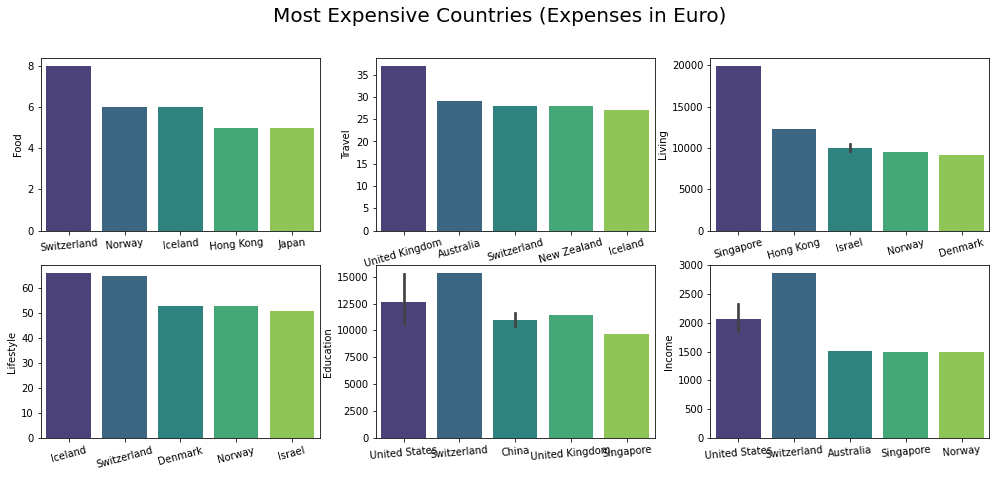

In [ ]:
# Let's check out the Top 5 Most Expensive Countries for Food
plt.rcParams['figure.figsize'] = (17, 7)

plt.subplot(2, 3, 1)
x = city[['Country','Food']].groupby('Country').mean().sort_values(by = 'Food', ascending = False).head(5)
x=x.reset_index()
sns.barplot(x['Country'], x['Food'], palette = 'viridis')
plt.xticks(rotation = 5)
plt.xlabel(' ')

plt.subplot(2, 3, 2)
x = city[['Country','Travel']].sort_values(by = 'Travel', ascending = False).head(5)
sns.barplot(x['Country'], x['Travel'], palette = 'viridis')
plt.xticks(rotation = 16)
plt.xlabel(' ')

plt.subplot(2, 3, 3)
x = city[['Country','Living']].sort_values(by = 'Living', ascending = False).head(6)
sns.barplot(x['Country'], x['Living'], palette = 'viridis')
plt.xticks(rotation = 15)
plt.xlabel(' ')

plt.subplot(2, 3, 4)
x = city[['Country','Lifestyle']].sort_values(by = 'Lifestyle', ascending = False).head(5)
sns.barplot(x['Country'], x['Lifestyle'], palette = 'viridis')
plt.xticks(rotation = 15)
plt.xlabel(' ')

plt.subplot(2, 3, 5)
x = city[['Country','Education']].sort_values(by = 'Education', ascending = False).head(11)
sns.barplot(x['Country'], x['Education'], palette = 'viridis')
plt.xticks(rotation = 5)
plt.xlabel(' ')

plt.subplot(2, 3, 6)
x = city[['Country','Income']].sort_values(by = 'Income', ascending = False).head(18)
sns.barplot(x['Country'], x['Income'], palette = 'viridis')
plt.xticks(rotation = 5)
plt.xlabel(' ')

plt.suptitle('Most Expensive Countries (Expenses in Euro)', fontsize = 20)
plt.show()

In [ ]:
x = city[['Country','Income']].groupby('Country').mean().sort_values(by = 'Income', ascending = False).head(5)

print(x.reset_index().columns)

Index(['Country', 'Income'], dtype='object')


In [ ]:
city[['Country','Education']].sort_values(by = 'Education', ascending = False).head(20)

,Country,Education
78,United States,18274
144,Switzerland,15304
100,United States,13809
47,United States,13089
125,China,11574
70,United Kingdom,11423
102,United States,10650
90,China,10375
71,United States,10143
62,United States,9785


In [ ]:
#city[city["Country"]=="Georgia"]#["Country"]="United States"
city.loc[63]["Country"]="United States"
city.loc[63]["Country"]
city.at[63, 'Country']="United States"
print(city.loc[63]["Country"])

United States


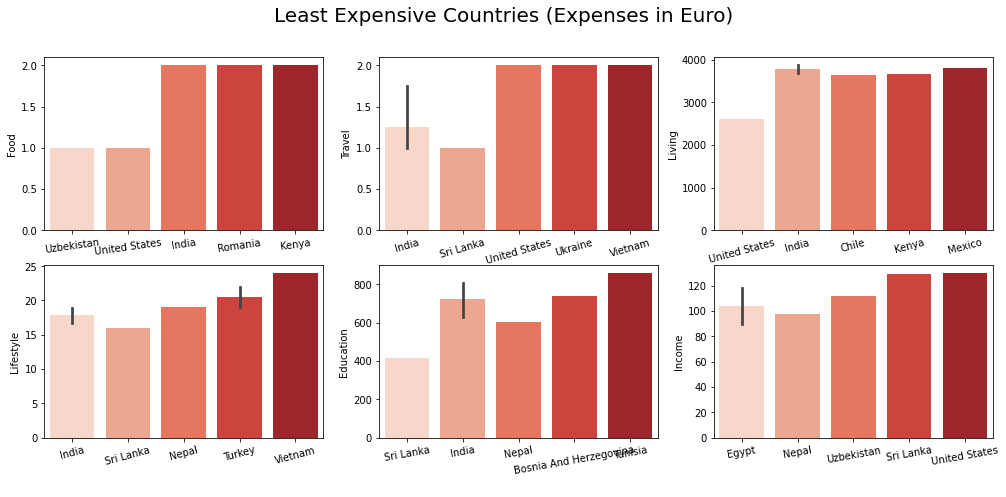

In [ ]:
# Let's check out the Top 5 Least Expensive Countries
plt.rcParams['figure.figsize'] = (17, 7)

plt.subplot(2, 3, 1)
x = city[['Country','Food']].sort_values(by = 'Food', ascending = True).head(5)
sns.barplot(x['Country'], x['Food'], palette = 'Reds')
plt.xticks(rotation = 8)
plt.xlabel(' ')

plt.subplot(2, 3, 2)
x = city[['Country','Travel']].sort_values(by = 'Travel', ascending = True).head(9)
sns.barplot(x['Country'], x['Travel'], palette = 'Reds')
plt.xticks(rotation = 16)
plt.xlabel(' ')

plt.subplot(2, 3, 3)
x = city[['Country','Living']].sort_values(by = 'Living', ascending = True).head(9)
sns.barplot(x['Country'], x['Living'], palette = 'Reds')
plt.xticks(rotation = 15)
plt.xlabel(' ')

plt.subplot(2, 3, 4)
x = city[['Country','Lifestyle']].sort_values(by = 'Lifestyle', ascending = True).head(18)
sns.barplot(x['Country'], x['Lifestyle'], palette = 'Reds')
plt.xticks(rotation = 15)
plt.xlabel(' ')

plt.subplot(2, 3, 5)
x = city[['Country','Education']].sort_values(by = 'Education', ascending = True).head(9)
sns.barplot(x['Country'], x['Education'], palette = 'Reds')
plt.xticks(rotation = 10)
plt.xlabel(' ')

plt.subplot(2, 3, 6)
x = city[['Country','Income']].sort_values(by = 'Income', ascending = True).head(6)
sns.barplot(x['Country'], x['Income'], palette = 'Reds')
plt.xticks(rotation = 10)
plt.xlabel(' ')

plt.suptitle('Least Expensive Countries (Expenses in Euro)', fontsize = 20)
plt.show()

In [ ]:
city.describe()

,latitude,longitude,Food,Travel,Living,Lifestyle,Education,Income
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,32.644523,14.645069,3.043750,10.231250,5622.043750,34.156250,4243.525000,726.937500
std,24.340839,67.855640,1.260662,7.575384,1916.624888,9.188828,3156.485586,627.321046
min,-37.814218,-123.364953,1.000000,1.000000,2609.000000,15.000000,417.000000,90.000000
25%,25.065092,-1.208147,2.000000,5.000000,4480.500000,29.000000,1954.500000,241.500000
50%,41.079542,20.731811,3.000000,7.000000,5080.500000,34.000000,3414.000000,434.000000
75%,48.940584,46.059256,4.000000,16.000000,6502.750000,39.250000,5606.750000,1188.250000
max,64.145981,174.763180,8.000000,37.000000,19937.000000,66.000000,18274.000000,3268.000000


In [ ]:
(city.describe().loc['min',:]/city.describe().loc['max',:]).index[0:3]

Index(['latitude', 'longitude', 'Food'], dtype='object')

In [ ]:
# To find some interesting columns to plot I've sorted them by range. 
# Perhaps a better way to do this in future would be by variance.
top_range = (city.describe().loc['min',:]/city.describe().loc['max',:]).sort_values().index[2:22]
list(top_range)


['Education', 'Travel', 'Income', 'Food', 'Living', 'Lifestyle']

In [ ]:
def color_producer(val):
    if val <= city[item].quantile(.25):
        return 'forestgreen'
    elif val <= city[item].quantile(.50):
        return 'goldenrod'
    elif val <= city[item].quantile(.75):
        return 'darkred'
    else:
        return 'red'

In [ ]:
!pip install pydeck

     |████████████████████████████████| 4.2MB 27.4MB/s 
     |████████████████████████████████| 122kB 51.8MB/s 
     |████████████████████████████████| 788kB 31.1MB/s 
     |████████████████████████████████| 368kB 41.1MB/s 
ERROR: jupyter-console 5.2.0 has requirement prompt-toolkit<2.0.0,>=1.0.0, but you'll have prompt-toolkit 3.0.19 which is incompatible.
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 6.0.1 which is incompatible.
ERROR: google-colab 1.0.0 has requirement ipython~=5.5.0, but you'll have ipython 7.25.0 which is incompatible.
  Found existing installation: importlib-metadata 4.6.0
    Uninstalling importlib-metadata-4.6.0:
      Successfully uninstalled importlib-metadata-4.6.0
  Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Successfully uninstalled ipyth

In [ ]:
import pydeck as pdk

In [ ]:
df = city[["Food","latitude","longitude"]]
print(df.columns)
pdk.Deck(map_style='mapbox://styles/mapbox/light-v9',
initial_view_state=pdk.ViewState(
latitude=df['latitude'].mean(),
longitude=df['longitude'].mean(),
zoom=2,
pitch=50,
),
layers=[
pdk.Layer(
'HexagonLayer',
data=df,
get_position='[longitude, latitude]',
radius=200,
elevation_scale=4,
elevation_range=[0, 1000],
pickable=True,
extruded=True,
),
pdk.Layer('ScatterplotLayer',
data=df,
get_position='[longitude, latitude]',
get_color='[200, 30, 0, 160]',
get_radius=200,),],)


Index(['Food', 'latitude', 'longitude'], dtype='object')


<IPython.core.display.Javascript object>

AttributeError: ignored

{"initialViewState": {"latitude": 32.644522930937505, "longitude": 14.645069395435678, "pitch": 50, "zoom": 2}, "layers": [{"@@type": "HexagonLayer", "data": [{"Food": 2, "latitude": 59.938732, "longitude": 30.316229}, {"Food": 2, "latitude": 41.0096334, "longitude": 28.9651646}, {"Food": 2, "latitude": 38.4147331, "longitude": 27.1434119}, {"Food": 4, "latitude": 60.1674881, "longitude": 24.9427473}, {"Food": 2, "latitude": 47.0245117, "longitude": 28.8322923}, {"Food": 4, "latitude": 45.4668, "longitude": 9.1905}, {"Food": 2, "latitude": 30.0443879, "longitude": 31.2357257}, {"Food": 2, "latitude": 44.7720845, "longitude": 17.1917651}, {"Food": 2, "latitude": 40.3754434, "longitude": 49.8326748}, {"Food": 2, "latitude": 20.6720375, "longitude": -103.338396}, {"Food": 2, "latitude": 27.708317, "longitude": 85.3205817}, {"Food": 2, "latitude": 21.0294498, "longitude": 105.8544441}, {"Food": 2, "latitude": 10.7715512, "longitude": 106.6983801}, {"Food": 2, "latitude": 19.4326296, "longi

In [ ]:
map = folium.Map(location=[city['latitude'].mean(),
                           city['longitude'].mean()],
                 tiles='Stamen Terrain',
                 zoom_start=2)

item = top_range[0]

# Add a bubble map to the base map
for i in range(0,len(city)):
    Circle(
        location=[city.iloc[i]['latitude'], city.iloc[i]['longitude']],
        radius=120000,
        color=color_producer(city.iloc[i][item])).add_to(map)

print ('Price of: ', item)
map

Price of:  Education


In [ ]:
import pandas as pd
us_cities = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/us-cities-top-1k.csv")

import plotly.express as px

fig = px.scatter_mapbox(city, lat="latitude", lon="longitude", hover_name="Country", hover_data=["Food","Travel"],
                        color_discrete_sequence=["fuchsia"], zoom=3, height=300)
fig.update_layout(
    mapbox_style="white-bg",
    mapbox_layers=[
        {
            "below": 'traces',
            "sourcetype": "raster",
            "sourceattribution": "United States Geological Survey",
            "source": [
                "https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"
            ]
        }
      ])
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


In [ ]:
map = folium.Map(location=[city['latitude'].mean(),
                           city['longitude'].mean()],
                 tiles='CartoDB dark_matter',
                 zoom_start=2)

item = top_range[1]

# Add a bubble map to the base map
for i in range(0,len(city)):
    Circle(
        location=[city.iloc[i]['latitude'], city.iloc[i]['longitude']],
        radius=120000,
        color=color_producer(city.iloc[i][item])).add_to(map)

print ('Price of: ', item)
map

Price of:  Travel


In [ ]:
map = folium.Map(location=[city['latitude'].mean(),
                           city['longitude'].mean()],
                 tiles='Stamen Toner',
                 zoom_start=2)

item = top_range[2]

# Add a bubble map to the base map
for i in range(0,len(city)):
    Circle(
        location=[city.iloc[i]['latitude'], city.iloc[i]['longitude']],
        radius=120000,
        color=color_producer(city.iloc[i][item])).add_to(map)

print ('Price of: ', item)
map

Price of:  Income


In [ ]:
map = folium.Map(location=[city['latitude'].mean(),
                           city['longitude'].mean()],
                 tiles='Stamen Watercolor',
                 zoom_start=2)

item = top_range[3]

# Add a bubble map to the base map
for i in range(0,len(city)):
    Circle(
        location=[city.iloc[i]['latitude'], city.iloc[i]['longitude']],
        radius=120000,
        color=color_producer(city.iloc[i][item])).add_to(map)

print ('Price of: ', item)
map

Price of:  Food


In [ ]:
map = folium.Map(location=[city['latitude'].mean(),
                           city['longitude'].mean()],
                 tiles='Open Street Map',
                 zoom_start=2)

item = top_range[4]

# Add a bubble map to the base map
for i in range(0,len(city)):
    Circle(
        location=[city.iloc[i]['latitude'], city.iloc[i]['longitude']],
        radius=120000,
        color=color_producer(city.iloc[i][item])).add_to(map)

print ('Price of: ', item)
map

Price of:  Living


In [ ]:
map = folium.Map(location=[city['latitude'].mean(),
                           city['longitude'].mean()],
                 tiles='CartoDB Positron',
                 zoom_start=2)

item = top_range[5]

# Add a bubble map to the base map
for i in range(0,len(city)):
    Circle(
        location=[city.iloc[i]['latitude'], city.iloc[i]['longitude']],
        radius=120000,
        color=color_producer(city.iloc[i][item])).add_to(map)

print ('Price of: ', item)
map

Price of:  Lifestyle


In [ ]:
import plotly.figure_factory as ff

In [ ]:
np.array(city[['Food','Travel','Living','Lifestyle','Education','Income']].corr())

array([[1.        , 0.80962915, 0.58139838, 0.79479907, 0.74161434,
        0.87297877],
       [0.80962915, 1.        , 0.45603446, 0.7565377 , 0.64717297,
        0.81947563],
       [0.58139838, 0.45603446, 1.        , 0.51552793, 0.48514185,
        0.4445129 ],
       [0.79479907, 0.7565377 , 0.51552793, 1.        , 0.58338334,
        0.70081609],
       [0.74161434, 0.64717297, 0.48514185, 0.58338334, 1.        ,
        0.7971695 ],
       [0.87297877, 0.81947563, 0.4445129 , 0.70081609, 0.7971695 ,
        1.        ]])

In [ ]:
fig = ff.create_annotated_heatmap(city[['Food','Travel','Living','Lifestyle','Education','Income']].corr(), colorscale='Viridis')
fig.show()

KeyError: ignored

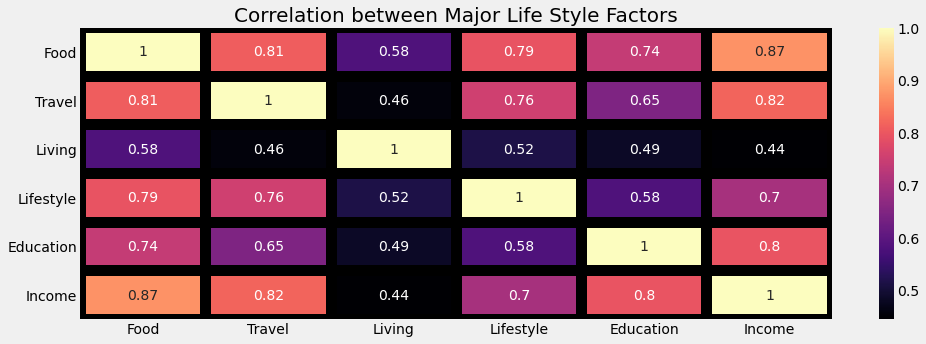

In [ ]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

sns.heatmap(city[['Food','Travel','Living','Lifestyle','Education','Income']].corr(),
            cmap = 'magma', 
            annot = True, linecolor='black', linewidths = 10)
plt.title('Correlation between Major Life Style Factors', fontsize = 20)
plt.show()

## Comparing Some of the Most Popular Countries in the World

In [ ]:
w=[False]*len(city['Country'])
w=pd.Series(w)

print(list(w))

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False

In [ ]:
myseries = pd.Series([1,4,0,7,5], index=[0,1,2,3,4])
myseries[myseries == 7].index[0]

3

In [ ]:
city['Location'].loc(63)

ValueError: ignored

In [ ]:
tl=['Australia','Canada']
l=[]
for i in tl:
  l=l+list(city[city['Country']==i].index)#Index(city['Country']).get_loc(i))
#xe=pd.Series(tl)
l
for item in l:
  w[item]=True

In [ ]:
city[w][['Location','Food', 
                'Travel','Living','Lifestyle','Education',
                    'Income']].set_index('Location').sort_values(by = 'Income',
                                ascending = False).style.background_gradient(cmap = 'viridis')

,Food,Travel,Living,Lifestyle,Education,Income
Location,,,,,,
"Brisbane, Australia",5,22,4644,39,4910,1517
"Sydney, Australia",5,29,5781,42,6661,1511
"Calgary, Canada",4,17,4747,36,5599,1480
"Ottawa, Canada",4,17,4818,39,4911,1454
"Melbourne, Australia",4,21,5218,39,7062,1398
"Adelaide, Australia",4,16,4309,34,4606,1329
"Vancouver, Canada",5,16,6153,38,7471,1315
"Edmonton, Canada",4,16,4513,36,3714,1278
"Perth, Australia",4,20,4709,39,6358,1249


In [ ]:
city['Country'][['Location','Food', 
                'Travel','Living','Lifestyle','Education',
                    'Income']]

KeyError: ignored

In [ ]:
a=(city['Country']=="Canada")| (city['Country'] == 'Australia')
for i in tl:
  b=city['Country']==i
print(a)
print("_________________")
print(b)

0      False
1      False
2      False
3      False
4      False
       ...  
155     True
156     True
157     True
158    False
159    False
Name: Country, Length: 160, dtype: bool
_________________
0       True
1      False
2      False
3      False
4      False
       ...  
155    False
156    False
157    False
158    False
159    False
Name: Country, Length: 160, dtype: bool


In [ ]:
city[(city['Country'] == 'United Kingdom') | (city['Country'] == 'Australia') | 
     (city['Country'] == 'Germany') | (city['Country'] == 'China') | (city['Country'] == 'Canada') | 
    (city['Country'] == 'Russia')][['Location','Food', 
                'Travel','Living','Lifestyle','Education',
                    'Income']].set_index('Location').sort_values(by = 'Income',
                                ascending = False).style.background_gradient(cmap = 'viridis')

,Food,Travel,Living,Lifestyle,Education,Income
Location,,,,,,
"Brisbane, Australia",5,22,4644,39,4910,1517
"Sydney, Australia",5,29,5781,42,6661,1511
"Calgary, Canada",4,17,4747,36,5599,1480
"Ottawa, Canada",4,17,4818,39,4911,1454
"Melbourne, Australia",4,21,5218,39,7062,1398
"London, United Kingdom",4,37,9069,42,11423,1380
"Adelaide, Australia",4,16,4309,34,4606,1329
"Munich, Germany",4,17,7445,44,5867,1315
"Vancouver, Canada",5,16,6153,38,7471,1315


In [ ]:
list(city['Country'])

['Russia',
 'Turkey',
 'Turkey',
 'Finland',
 'Moldova',
 'Italy',
 'Egypt',
 'Bosnia And Herzegovina',
 'Azerbaijan',
 'Mexico',
 'Nepal',
 'Vietnam',
 'Vietnam',
 'Mexico',
 'Italy',
 'Mexico',
 'Russia',
 'Bosnia And Herzegovina',
 'Ukraine',
 'Ukraine',
 'Canada',
 'Tunisia',
 'Canada',
 'Netherlands',
 'Serbia',
 'Ukraine',
 'France',
 'Netherlands',
 'Bulgaria',
 'Greece',
 'Canada',
 'Bulgaria',
 'Netherlands',
 'Bulgaria',
 'Serbia',
 'Netherlands',
 'Germany',
 'Lebanon',
 'United States',
 'Singapore',
 'Canada',
 'New Zealand',
 'Montenegro',
 'Canada',
 'Japan',
 'Canada',
 'Canada',
 'United States',
 'United States',
 'Kazakhstan',
 'Norway',
 'Germany',
 'Slovakia',
 'United States',
 'Croatia',
 'Germany',
 'Poland',
 'Latvia',
 'Poland',
 'Chile',
 'Kenya',
 'United Arab Emirates',
 'United States',
 'Georgia',
 'United Arab Emirates',
 'Colombia',
 'Czech Republic',
 'Germany',
 'Poland',
 'United States',
 'United Kingdom',
 'United States',
 'Panama',
 'South Korea'

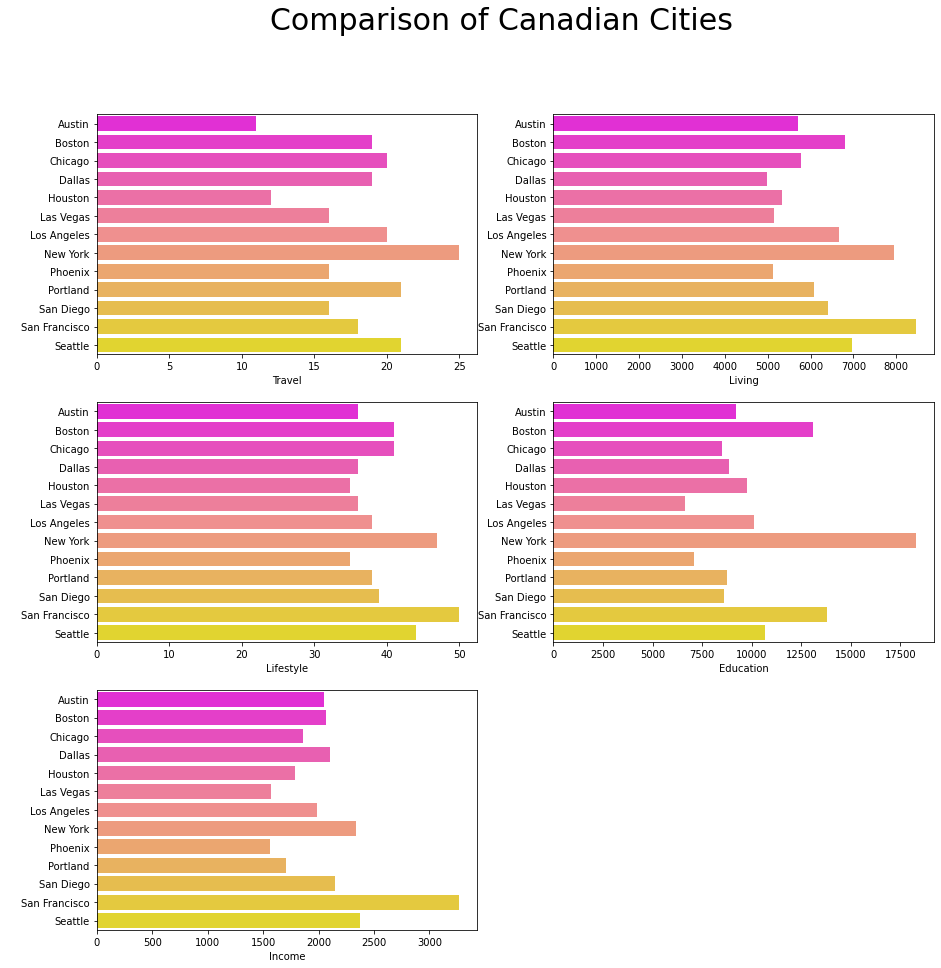

In [ ]:
# let's plot the Indian Cities to understand them better
city['City'] = city['Location'].str.split(', ')
city['City'] = city['City'].apply(lambda x: x[0])

x = city[city['Country'] == 'United States']

plt.rcParams['figure.figsize'] = (15, 15)
plt.subplot(3, 2, 1)
sns.barplot(y = x['City'], x = x['Travel'], palette = 'spring')
plt.ylabel(" ")

plt.subplot(3, 2, 2)
sns.barplot(y = x['City'], x = x['Living'], palette = 'spring')
plt.ylabel(" ")

plt.subplot(3, 2, 3)
sns.barplot(y = x['City'], x = x['Lifestyle'], palette = 'spring')
plt.ylabel(" ")

plt.subplot(3, 2, 4)
sns.barplot(y = x['City'], x = x['Education'], palette = 'spring')
plt.ylabel(" ")

plt.subplot(3, 2, 5)
sns.barplot(y = x['City'], x = x['Income'], palette = 'spring')
plt.ylabel(" ")

plt.suptitle('Comparison of Canadian Cities', fontsize = 30)
plt.show()

In [ ]:
# lets find out the List of Most Expensive Countries to Live in
x = city[['Food','Travel','Living','Lifestyle','Education','Income']]
mm = MinMaxScaler()
data = mm.fit_transform(x)
data = pd.DataFrame(data)
data.columns = x.columns
data.head()

,Food,Travel,Living,Lifestyle,Education,Income
0,0.142857,0.194444,0.139139,0.372549,0.139049,0.074890
1,0.142857,0.138889,0.161588,0.156863,0.177913,0.043424
2,0.142857,0.111111,0.155125,0.078431,0.121129,0.036816
3,0.428571,0.527778,0.252539,0.568627,0.032424,0.346759
4,0.142857,0.027778,0.082583,0.333333,0.057568,0.018250


In [ ]:
data['Total Score'] = (data['Food'] + data['Travel'] + data['Living'] + 
                       data['Lifestyle'] + data['Education'] + data['Income'])/6

# concat city
cities = city[['City', 'Country']]
data = pd.concat([data, cities], axis = 1)
# lets sort the values
print("Most Expensive Places in the World\n")
data[['Country','City','Total Score']].sort_values(by = 'Total Score', ascending = False).head(10)

Most Expensive Places in the World



,Country,City,Total Score
144,Switzerland,Zurich,0.790375
78,United States,New York,0.670422
100,United States,San Francisco,0.660000
39,Singapore,Singapore,0.576437
70,United Kingdom,London,0.558841
128,Iceland,Reykjavik,0.557198
102,United States,Seattle,0.539670
50,Norway,Oslo,0.534259
47,United States,Boston,0.525962
71,United States,Los Angeles,0.487471


In [ ]:
# Cheapest places to live

print("Cheapest Places in the World\n")
data[['Country','City','Total Score']].sort_values(by = 'Total Score', ascending = True).head(10)

Cheapest Places in the World



,Country,City,Total Score
123,India,Kolkata,0.042501
106,India,Ahmedabad,0.043629
112,India,Chennai,0.056045
63,Georgia,Tbilisi,0.057976
118,India,Hyderabad,0.060394
81,India,Chandigarh,0.063713
130,India,Pune,0.069141
82,Sri Lanka,Colombo,0.069626
114,India,Delhi,0.070959
127,India,Mumbai,0.071562


### Analyzing Cost of Essential Items

In [ ]:
city.columns

Index(['Location', 'Meal, Inexpensive Restaurant',
       'Meal for 2 People, Mid-range Restaurant, Three-course',
       'McMeal at McDonalds (or Equivalent Combo Meal)',
       'Domestic Beer (0.5 liter draught)',
       'Imported Beer (0.33 liter bottle)', 'Coke/Pepsi (0.33 liter bottle)',
       'Water (0.33 liter bottle) ', 'Milk (regular), (1 liter)',
       'Loaf of Fresh White Bread (500g)', 'Eggs (regular) (12)',
       'Local Cheese (1kg)', 'Water (1.5 liter bottle)',
       'Bottle of Wine (Mid-Range)', 'Domestic Beer (0.5 liter bottle)',
       'Imported Beer (0.33 liter bottle)', 'Cigarettes 20 Pack (Marlboro)',
       'One-way Ticket (Local Transport)',
       'Chicken Breasts (Boneless, Skinless), (1kg)',
       'Monthly Pass (Regular Price)', 'Gasoline (1 liter)', 'Volkswagen Golf',
       'Apartment (1 bedroom) in City Centre',
       'Apartment (1 bedroom) Outside of Centre',
       'Apartment (3 bedrooms) in City Centre',
       'Apartment (3 bedrooms) Outside of Cen

In [ ]:
# We know that the Most common things in day to day life are
# Internet, Basic Food ItemS such as Eggs, Milk, Breads, Electricity and Water, Taxi Travel

x = city[['Country','City','Milk (regular), (1 liter)',
         'Eggs (regular) (12)', 'Loaf of Fresh White Bread (500g)',
         'Internet (60 Mbps or More, Unlimited Data, Cable/ADSL)',
         'Taxi 1km (Normal Tariff)',
         'Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment',
          ]]

# lets rename these columns
x = x.rename(columns = {'Milk (regular), (1 liter)':'Milk','Eggs (regular) (12)':'Eggs', 
                       'Loaf of Fresh White Bread (500g)': 'Bread',
                       'Internet (60 Mbps or More, Unlimited Data, Cable/ADSL)': 'Internet',
                       'Taxi 1km (Normal Tariff)':'Taxi Travel',
                       'Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment':'Electricity and Water'})
x.head()

,Country,City,Milk,Eggs,Bread,Internet,Taxi Travel,Electricity and Water
0,Russia,Saint Petersburg,0.98,1.18,0.71,6.96,0.26,102.17
1,Turkey,Istanbul,0.71,1.62,0.36,14.2,0.47,59.33
2,Turkey,Izmir,0.65,1.51,0.38,12.89,0.57,51.07
3,Finland,Helsinki,0.96,2.02,2.27,22.31,1,82.66
4,Moldova,Chisinau,0.68,1.11,0.33,8.58,0.18,113.46


In [ ]:
x.dtypes

Country                  object
City                     object
Milk                     object
Eggs                     object
Bread                    object
Internet                 object
Taxi Travel              object
Electricity and Water    object
dtype: object

In [ ]:
x[['Milk','Bread','Eggs','Internet','Taxi Travel','Electricity and Water']].astype('float').describe()

,Milk,Bread,Eggs,Internet,Taxi Travel,Electricity and Water
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,0.998937,1.197875,1.902813,29.660875,0.922250,107.106125
std,0.391720,0.760670,0.752520,18.908249,0.709011,51.553830
min,0.390000,0.100000,0.750000,4.440000,0.140000,18.560000
25%,0.710000,0.555000,1.377500,12.832500,0.405000,63.860000
50%,0.895000,1.020000,1.850000,26.615000,0.630000,102.465000
75%,1.170000,1.690000,2.352500,43.317500,1.350000,145.707500
max,2.640000,3.330000,5.330000,93.290000,4.160000,265.520000


In [ ]:
plt.rcParams['figure.figsize'] = (10, 3)
# lets check those Countries where Milk is very Expensive
print(x[x['Milk'] > 1.17][['Country','City','Milk']].sort_values(by = 'Milk',
                                    ascending = False).head(5).set_index('Country'))

print('\n')
# lets check those Countries where Bread is very Expensive
print(x[x['Bread'] > 1.69][['Country','City','Bread']].sort_values(by = 'Bread',
                                    ascending = False).head(5).set_index('Country'))

print('\n')
# lets check those Countries where Bread is very Expensive
print(x[x['Eggs'] > 2.35][['Country','City','Eggs']].sort_values(by = 'Eggs',
                                    ascending = False).head(5).set_index('Country'))

print('\n')
# lets check those Countries where Bread is very Expensive
print(x[x['Internet'] > 43.37][['Country','City','Internet']].sort_values(by = 'Internet',
                                    ascending = False).head(5).set_index('Country'))

print('\n')
# lets check those Countries where Bread is very Expensive
print(x[x['Taxi Travel'] > 1.35][['Country','City','Taxi Travel']].sort_values(by = 'Taxi Travel',
                                    ascending = False).head(5).set_index('Country'))

print('\n')
# lets check those Countries where Bread is very Expensive
print(x[x['Electricity and Water'] > 145.7][['Country','City',
                        'Electricity and Water']].sort_values(by = 'Electricity and Water',
                                    ascending = False).head(5).set_index('Country'))

KeyError: ignored

### Analyzing Quality of Life

In [ ]:
life = pd.read_csv('movehubqualityoflife.csv')
life.head()

,City,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating
0,Caracas,65.18,11.25,44.44,83.45,8.61,85.70
1,Johannesburg,84.08,53.99,59.98,47.39,51.26,83.93
2,Fortaleza,80.17,52.28,45.46,66.32,36.68,78.65
3,Saint Louis,85.25,80.40,77.29,31.33,87.51,78.13
4,Mexico City,75.07,24.28,61.76,18.95,27.91,77.86


In [ ]:
# analyzing the factors describing quality of life
life.describe()

,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating
count,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000
mean,79.676713,46.477176,66.442824,45.240370,59.994537,41.338611
std,6.501011,20.614519,14.416412,25.369741,22.019376,16.416409
min,59.880000,6.380000,20.830000,0.000000,5.290000,9.110000
25%,75.070000,28.815000,59.420000,24.410000,42.752500,29.375000
50%,81.060000,49.220000,67.685000,37.210000,65.150000,41.140000
75%,84.020000,61.607500,77.207500,67.675000,78.617500,51.327500
max,100.000000,91.850000,95.960000,92.420000,97.910000,85.700000


In [ ]:
# lets analyze the Quality of Life

print('Cities having Best Quality of life')
display(life[['City','Quality of Life']].sort_values(by = 'Quality of Life',
                            ascending = False).head(10).set_index('City').style.background_gradient(cmap = 'Reds'))

print('Cities having Worst Quality of life')
display(life[['City','Quality of Life']].sort_values(by = 'Quality of Life',
                            ascending = True).head(10).set_index('City').style.background_gradient(cmap = 'Reds'))

Cities having Best Quality of life


,Quality of Life
City,
Zurich,97.910000
Canberra,93.050000
Adelaide,91.540000
Berlin,91.170000
Aachen,90.520000
Stuttgart,90.400000
Dresden,90.210000
Munich,90.080000
Edmonton,89.580000


Cities having Worst Quality of life


,Quality of Life
City,
Hanoi,5.290000
Caracas,8.610000
Manila,13.140000
Dhaka,13.480000
Tehran,14.330000
Nairobi,14.360000
Jakarta,15.660000
Baku,17.200000
Cairo,17.250000


In [ ]:
# lets analyze the heath care of cities

print('Cities having Best Health care Facility')
display(life[['City','Health Care']].sort_values(by = 'Health Care',
                            ascending = False).head(10).set_index('City').style.background_gradient(cmap = 'Greens'))

print('Cities having Worst Health care Facility')
display(life[['City', 'Health Care']].sort_values(by = 'Health Care',
                            ascending = True).head(10).set_index('City').style.background_gradient(cmap = 'Greens'))

Cities having Best Health care Facility


,Health Care
City,
Bangkok,95.960000
Canberra,91.900000
Pattaya,91.460000
Glasgow,90.550000
Taipei,88.890000
Brisbane,88.890000
Bristol,88.890000
Lyon,88.650000
Munich,88.430000


Cities having Worst Health care Facility


,Health Care
City,
Dhaka,20.830000
Hanoi,20.830000
Gaborone,27.780000
Baku,28.700000
Kolkata,31.290000
Indore,31.340000
Quito,32.410000
Belfast,33.330000
Kharkiv,35.060000


In [ ]:
# lets analyze the Crime Rate

print('Cities having Highest Crime Rate')
display(life[['City','Crime Rating']].sort_values(by = 'Crime Rating',
                            ascending = False).head(10).set_index('City').style.background_gradient(cmap = 'bone'))

print('Cities having Worst Health care Facility')
display(life[['City', 'Crime Rating']].sort_values(by = 'Crime Rating',
                            ascending = True).head(10).set_index('City').style.background_gradient(cmap = 'bone'))

Cities having Highest Crime Rate


,Crime Rating
City,
Caracas,85.700000
Johannesburg,83.930000
Fortaleza,78.650000
Saint Louis,78.130000
Mexico City,77.860000
Detroit,76.690000
Porto Alegre,76.460000
Noida,75.000000
Karachi,74.360000


Cities having Worst Health care Facility


,Crime Rating
City,
Malaga,9.110000
Marbella,9.110000
Abu Dhabi,10.860000
Tokyo,13.910000
Munich,15.340000
Aachen,15.340000
Dusseldorf,15.340000
Dresden,15.340000
Zurich,15.350000


## Recommending Better Cities to live

In [ ]:
citi='Toronto'
x = city[['City','Food','Education','Lifestyle','Travel', 'Income']]
food = x[x['City'] == citi]['Food']
edu = x[x['City'] == citi]['Education']
life = x[x['City'] == citi]['Lifestyle']
travel = x[x['City'] == citi]['Travel']
income = x[x['City'] == citi]['Income']
food.values[0]

5

In [ ]:
def recommend_better_cities(citi, factor = 'Lifestyle'):
    x = city[['City','Food','Education','Lifestyle','Travel', 'Income']]
    food = x[x['City'] == citi]['Food']
    edu = x[x['City'] == citi]['Education']
    life = x[x['City'] == citi]['Lifestyle']
    travel = x[x['City'] == citi]['Travel']
    income = x[x['City'] == citi]['Income']
    best_cities = x[(x['Food'] <= food.values[0]) & (x['Education'] <= edu.values[0]) & 
                   (x['Lifestyle'] <= life.values[0]) & (x['Travel'] <= travel.values[0]) &
                   (x['Income'] > income.values[0])]
    best = best_cities.sort_values(by = factor, ascending = False).head(10)
    return best['City'].reset_index(drop = True)

In [ ]:
recommend_better_cities('Toronto','Income')

0       Dallas
1       Austin
2     Portland
3    Las Vegas
4      Phoenix
5      Calgary
6     Adelaide
7    Vancouver
8     Edmonton
Name: City, dtype: object